# Library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load data

In [2]:
df = pd.read_csv("./Data/heart_clean_data.csv")
df.head(-5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  int64  
 3   AlcoholDrinking                 319795 non-null  int64  
 4   Stroke                          319795 non-null  int64  
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  int64  
 8   AgeCategory                     319795 non-null  int64  
 9   PhysicalActivity                319795 non-null  int64  
 10  GenHealth                       319795 non-null  int64  
 11  SleepTime                       319795 non-null  float64
 12  Asthma          

# Transform data

In [3]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
print(m,n)

319795 26


# Split data

In [4]:
data_test = data[0:int(m*.1)].T
Y_test = data_test[0]
X_test = data_test[1:n]
Y_test = Y_test.astype(int)

data_train = data[int(m*.1):m].T
Y_train = data_train[0]
X_train = data_train[1:n]
Y_train = Y_train.astype(int)


# My CNN

## Model

In [5]:
from Class.cnn import cnn

### Define model

In [6]:
mycnn = cnn (inputLayer = n-1)

In [7]:
mycnn.addLayer(neurons=5)
mycnn.addLayer(neurons=2)

### Train

Final accuracy: 
0.9141695684736366


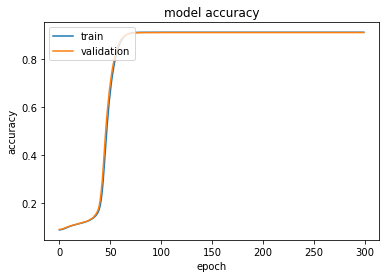

In [8]:
history = mycnn.fit(X_train, Y_train, 0.010, 300, validationSplit = 0.1)
plt.plot(history['train_accuracy'])
plt.plot(history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Test

In [9]:
mycnn.test_prediction(9,X_train, Y_train)
mycnn.test_prediction(10,X_train, Y_train)
mycnn.test_prediction(11,X_train, Y_train)
mycnn.test_prediction(12,X_train, Y_train)

Prediction:  [0]
Label:  0
Prediction:  [0]
Label:  0
Prediction:  [0]
Label:  0
Prediction:  [0]
Label:  0


## Test accuracy

In [10]:
prediction = mycnn.make_prediction(X_test)
mycnn.get_accuracy(prediction, Y_test)

0.9176334469495606

## Save model

In [11]:
mycnn.saveModel('Weights/heartCNN')


### Load model

In [12]:
mycnn2 = cnn(loadModel='Weights/heartCNN')

### Test load model

In [13]:
prediction = mycnn2.make_prediction(X_test)
mycnn2.get_accuracy(prediction, Y_test)

0.9176334469495606

# Keras CNN

## Prepare data

In [14]:
x_test = pd.DataFrame(X_test.T)
x_test
y_test = pd.DataFrame(Y_test.T)
y_test
x_train = pd.DataFrame(X_train.T)
x_train
y_train = pd.DataFrame(Y_train.T)
y_train


,0
0,1
1,0
2,0
3,0
4,1
...,...
287811,0
287812,0
287813,0
287814,0


## Library

In [15]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

## Define model

In [16]:
model = Sequential()
model.add(Dense(units=5, activation='relu', input_dim=len(x_train.columns)))
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


## Train model

In [17]:

history = model.fit(x_train, y_train,validation_split=0.20, epochs=300, verbose=1, batch_size=1000)


Epoch 1/300
231/231 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.8520 - val_loss: 0.3123 - val_accuracy: 0.9034
Epoch 2/300
231/231 [==============================] - 0s 867us/step - loss: 0.2939 - accuracy: 0.9077 - val_loss: 0.2891 - val_accuracy: 0.9086
Epoch 3/300
231/231 [==============================] - 0s 993us/step - loss: 0.2775 - accuracy: 0.9109 - val_loss: 0.2749 - val_accuracy: 0.9108
Epoch 4/300
231/231 [==============================] - 0s 997us/step - loss: 0.2629 - accuracy: 0.9125 - val_loss: 0.2591 - val_accuracy: 0.9114
Epoch 5/300
231/231 [==============================] - 0s 907us/step - loss: 0.2462 - accuracy: 0.9131 - val_loss: 0.2410 - val_accuracy: 0.9122
Epoch 6/300
231/231 [==============================] - 0s 878us/step - loss: 0.2352 - accuracy: 0.9144 - val_loss: 0.2357 - val_accuracy: 0.9133
Epoch 7/300
231/231 [==============================] - 0s 898us/step - loss: 0.2321 - accuracy: 0.9151 - val_loss: 0.2337 - val_accu

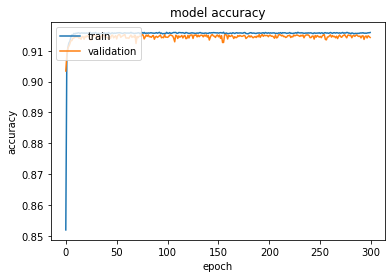

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Test accuracy

In [19]:
y_hat = model.predict_classes(x_test)
y_hat

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:

accuracy_score(y_test, y_hat)

0.9174145533006035

## Save model

In [21]:
model.save('Weights/heart_tfmodel')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Weights/heart_tfmodel\assets


## Load model

In [22]:
model2 = load_model('Weights/heart_tfmodel')

In [23]:
y_hat = model2.predict_classes(x_test)
y_hat
accuracy_score(y_test, y_hat)

0.9174145533006035